In [1]:
#======================================================#
#     LAB 9 - MNIST Fashion using Neural Network       #
#     Author: SHIKHAR ASTHANA                          #
#     Roll No. : 2K22/AFI/24                           #
#     Subject: ANN Lab (Anil Singh Parihar Sir)        #
#======================================================#

In [2]:
#Import the header files
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.datasets import mnist

In [3]:
#Checking if GPU is compatible
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [4]:
#Loading MNIST Digit Dataset
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

ERROR! Session/line number was not unique in database. History logging moved to new session 135
4423680/4422102 [==============================] - 0s 0us/step


In [5]:
#Reshaping data so that evry pixel value can be fed into the model
X_train = X_train.reshape(X_train.shape[0], 784)
X_val = X_val.reshape(X_val.shape[0], 784)
X_test = X_test.reshape(X_test.shape[0], 784)

In [6]:
#Scaling the pixel values
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [7]:
#Building the model
#Currently only 3 hidden layer
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(784,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax')
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                330       
Total params: 111,146
Trainable params: 111,146
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val))

test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 100s 2ms/sample - loss: 0.5328 - accuracy: 0.8128 - val_loss: 0.3998 - val_accuracy: 0.8543
Epoch 2/20
48000/48000 [==============================] - 5s 112us/sample - loss: 0.3876 - accuracy: 0.8622 - val_loss: 0.3563 - val_accuracy: 0.8705
Epoch 3/20
48000/48000 [==============================] - 5s 113us/sample - loss: 0.3480 - accuracy: 0.8744 - val_loss: 0.3567 - val_accuracy: 0.8730
Epoch 4/20
48000/48000 [==============================] - 6s 115us/sample - loss: 0.3237 - accuracy: 0.8824 - val_loss: 0.3576 - val_accuracy: 0.8732
Epoch 5/20
48000/48000 [==============================] - 6s 116us/sample - loss: 0.3001 - accuracy: 0.8897 - val_loss: 0.3425 - val_accuracy: 0.8804
Epoch 6/20
48000/48000 [==============================] - 5s 113us/sample - loss: 0.2811 - accuracy: 0.8969 - val_loss: 0.3378 - val_accuracy: 0.8860
Epoch 7/20
48000/48000 [==========================

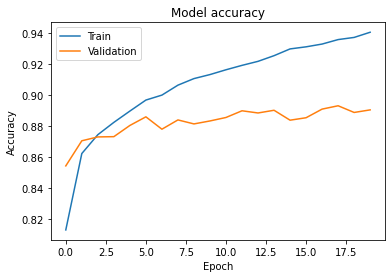

In [11]:
# Plot training history
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()